<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" style="float:right"/>  
    
<h1> Machine Learning I: Project Avocado Price Prediction  </h1>
<img src="https://github.com/Ashwani-ML-AL/Images/blob/master/Avocado.JPG?raw=true" width="1050" height="20" style="float:left"/>

   <h1> By : Arul Pandita </h1>

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Exploratory Data Analysis](#section3)</br>   

- 4. [Data Preparation](#section4)</br>
- 5. [Modeling and Evaluation](#section5)<br/>

<a id=section1></a>
## 1. Problem Statement !

Given the data make a model to predict the average price of the avocado.Evaluate the model using possible __model evaluation techniques__.

In this study, we will try to see if we can predict the Avocado’s Average Price based on different features. . The features are different (Total Bags,Date,Type,Year,Region..).

The variables of the dataset are the following:

Categorical: ‘region’,’type’ <br/>
Date: ‘Date’ <br/>
Numerical:‘Unamed: 0’,’Total Volume’, ‘4046’, ‘4225’, ‘4770’, ‘Total Bags’, ‘Small Bags’,’Large Bags’,’XLarge Bags’,’Year’
Target:‘AveragePrice’ <br/>


<a id=section101></a>
### 1.1. Introduction
This Project is to understand the fundamentals of the Machine Language I, I have taken avacado data set provided by Insaid and will try to predect the price , data would be used for test and train,so as to predect model evalution.

<a id=section102></a>
### 1.2. Data source and dataset

Date - The date of the observation <br/>
AveragePrice - the average price of a single avocado - target variable <br/>
type - conventional or organic <br/>
year - the year <br/>
Region - the city or region of the observation <br/>
Total Volume - Total number of avocados sold <br/>
4046 - Total number of avocados with PLU 4046 sold <br/>
4225 - Total number of avocados with PLU 4225 sold <br/>
4770 - Total number of avocados with PLU 4770 sold <br/>

Unamed: 0’ : Its just a useless index feature that will be removed later <br/>
,’Total Volume’ : Total sales volume of avocados<br/>
‘4046’ : Total sales volume of Small/Medium Hass Avocado<br/>
‘4225’ : Total sales volume of Large Hass Avocado<br/>
‘4770’ : Total sales volume of Extra Large Hass Avocado<br/>
‘Total Bags’: Total number of Bags sold<br/>
‘Small Bags’: Total number of Small Bags sold <br/>
Large Bags’: Total number of Large Bags sold <br/>
‘XLarge Bags’: Total number of XLarge Bags sold <br/>

Data: https://github.com/insaid2018/Term-2/blob/master/Term-I-II%20EDA%20Project%20Datasets.ipynb <br/>


<a id=section2></a>
### 2. Load the packages and data

In [ ]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
from sklearn import metrics
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from subprocess import check_output
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                            # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns
print('done')


done


Read in the Avocado Prices csv file as a DataFrame called AD

In [ ]:
AD = pd.read_csv("https://raw.githubusercontent.com/Ashwani-ML-AL/Data/main/avocado.csv")

<a id=section3></a>
### 3. Exploratory Data Analysis

Lets check our data head:


In [ ]:
AD.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [ ]:
AD.shape

(18249, 14)

In [ ]:
AD.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [ ]:
AD.type.value_counts()  # Balanced Dataset

conventional    9126
organic         9123
Name: type, dtype: int64

In [ ]:
AD.region.value_counts() # Balanced DataSet

PhoenixTucson          338
HarrisburgScranton     338
Tampa                  338
LosAngeles             338
Albany                 338
Houston                338
Boise                  338
BuffaloRochester       338
NorthernNewEngland     338
NewYork                338
LasVegas               338
SanDiego               338
Detroit                338
Plains                 338
Charlotte              338
Philadelphia           338
Syracuse               338
SanFrancisco           338
Sacramento             338
GrandRapids            338
CincinnatiDayton       338
Northeast              338
TotalUS                338
West                   338
SouthCarolina          338
Orlando                338
Columbus               338
BaltimoreWashington    338
Pittsburgh             338
Denver                 338
Louisville             338
Atlanta                338
SouthCentral           338
NewOrleansMobile       338
Chicago                338
California             338
StLouis                338
R

In [ ]:
AD.year.value_counts() # Year for 2015,2016 and 2017 are balanced but 2018 would not be balanced data with other year

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [ ]:
AD.describe()
#AD.describe(include = 'all')

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,conventional,organic
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,0.500082,0.499918
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,0.500014,0.500014
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,0.000000,0.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,0.000000,0.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,1.000000,0.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,1.000000,1.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,1.000000,1.000000


In [ ]:
AD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
AD.isnull().sum()  # No Null Values

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

###### Observation :

No Missing Values (18249 complete data) and 13 columns.

Feature Engineering on the Date Feature so we can be able to use the month columns in building our machine learning model later



In [ ]:
# Convert Date column from object to date
AD.Date = pd.to_datetime(AD.Date)

In [ ]:
AD.info()  # Get General idea about our data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
 14  Month         18249 non-null  int64         
 15  conventional  18249 non-null  uint8 

In [ ]:
AD.isnull().sum()  # Just to check again

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### Preprocessing the data ###

1.  Create new column "Month" by splitting date column.
2.  Columns 4046, 4225, 4770 represent the PLU code of the small, large and extra large avacadoes.
3.  We can drop date column as we have Month and Year in the dataframe.
4.  Drop the unnamed column as well as this seems to be serial number.
5.  AveragePrice is the label that i am selecting and will try to predict the price.
6.  No need of scaling data using ( StandardScaler or RobustScaler)


In [ ]:
AD['Month'] = AD.Date.dt.month
#AD['Day'] = AD.Date.dt.day

The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, lets remove it !

In [ ]:
AD.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,conventional,organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,1,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,1,0


Now lets do some plots!! I'll start by plotting the Avocado's Average Price through the Date column

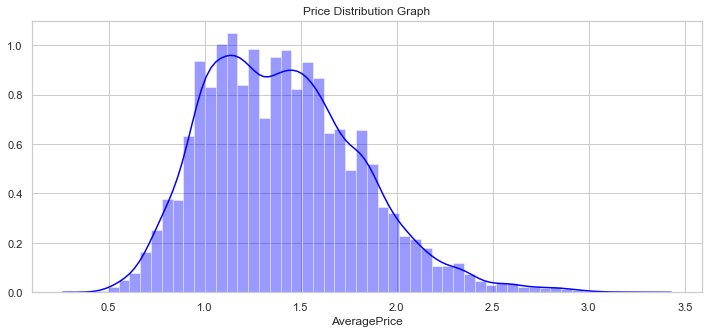

In [ ]:
plt.figure(figsize=(12,5))                        # Distribution curve for AverageProce ( Traget Variable)
plt.title("Price Distribution Graph")
ax = sns.distplot(AD["AveragePrice"], color = 'blue')

We could notice that the price is slightly right skewed and most of the time the price is between 1 and 1.7

Text(0.5, 1.0, 'Average Price')

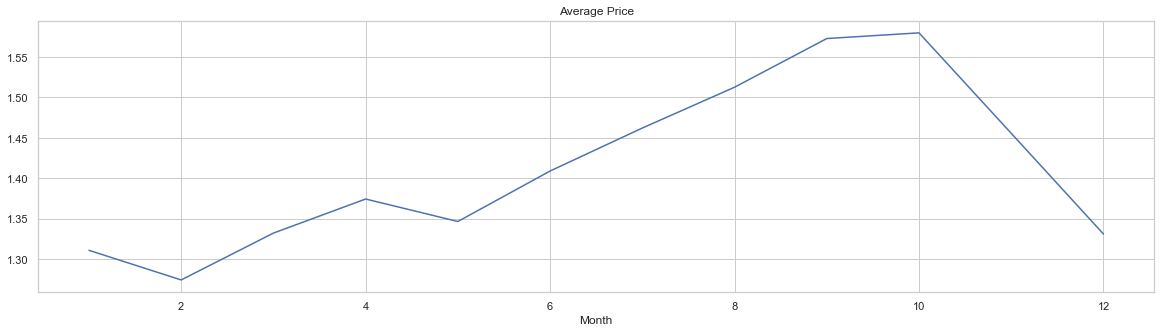

In [ ]:
dategroup=AD.groupby('Month').mean()
plt.figure(figsize=(20,5))
dategroup['AveragePrice'].plot(x=AD.Month)
plt.title('Average Price')

Text(0.5, 1.0, 'Total Volume')

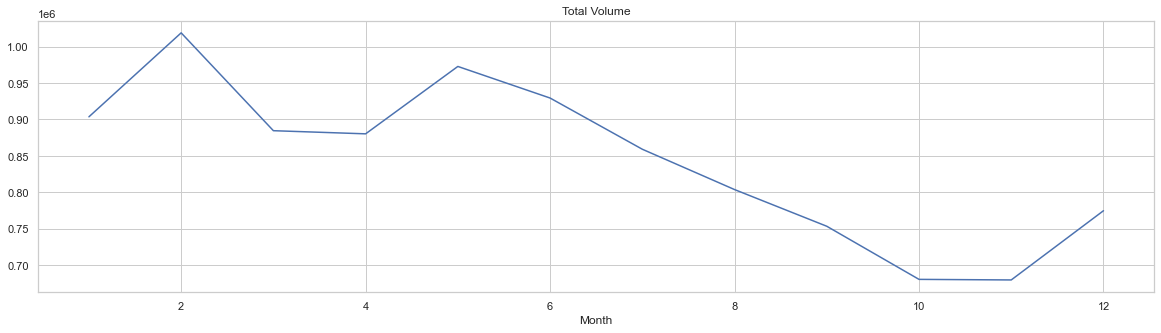

In [ ]:
dategroup=AD.groupby('Month').mean()
plt.figure(figsize=(20,5))
dategroup['Total Volume'].plot(x=AD.Month)
plt.title('Total Volume')

From the above chart we could infer that

*   We could observe from this graph that September and October are the months where the price seems to be at its highest
*   February is the month where the price seems to be the lowest.
*   Though the volume almost remained same, price seems to increase year on year

By comparing two charts above we could see that sometimes price and volume and inversely proportional(i.e. When volume increases price decreases)

This confirms our previous observation that Feb is the lowest price month and oct and Nov seems to be the highest priced months

In [ ]:
# Sales per year
'''plt.figure(figsize=(35,5))
sns.countplot('year',data = AD,palette="prism")
plt.title("Number of  Sales per Year",fontsize=18,fontweight="bold")
plt.xlabel('Year')
plt.ylabel('Sales Numbers')
plt.show()'''

'plt.figure(figsize=(35,5))\nsns.countplot(\'year\',data = AD,palette="prism")\nplt.title("Number of  Sales per Year",fontsize=18,fontweight="bold")\nplt.xlabel(\'Year\')\nplt.ylabel(\'Sales Numbers\')\nplt.show()'

In [ ]:
# Check % of type for each year
'''f,ax = plt.subplots(1,4,figsize=(25,6))
AD['type'][AD['year'] == 2015].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
AD['type'][AD['year'] == 2016].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
AD['type'][AD['year'] == 2017].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
AD['type'][AD['year'] == 2018].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[3],shadow=True)
ax[0].set_title('Year 2015')
ax[1].set_title('Year 2016')
ax[2].set_title('Year 2017')
ax[3].set_title('Year 2018')'''

"f,ax = plt.subplots(1,4,figsize=(25,6))\nAD['type'][AD['year'] == 2015].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)\nAD['type'][AD['year'] == 2016].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)\nAD['type'][AD['year'] == 2017].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)\nAD['type'][AD['year'] == 2018].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[3],shadow=True)\nax[0].set_title('Year 2015')\nax[1].set_title('Year 2016')\nax[2].set_title('Year 2017')\nax[3].set_title('Year 2018')"

Text(0, 0.5, 'Price (in million INR)')

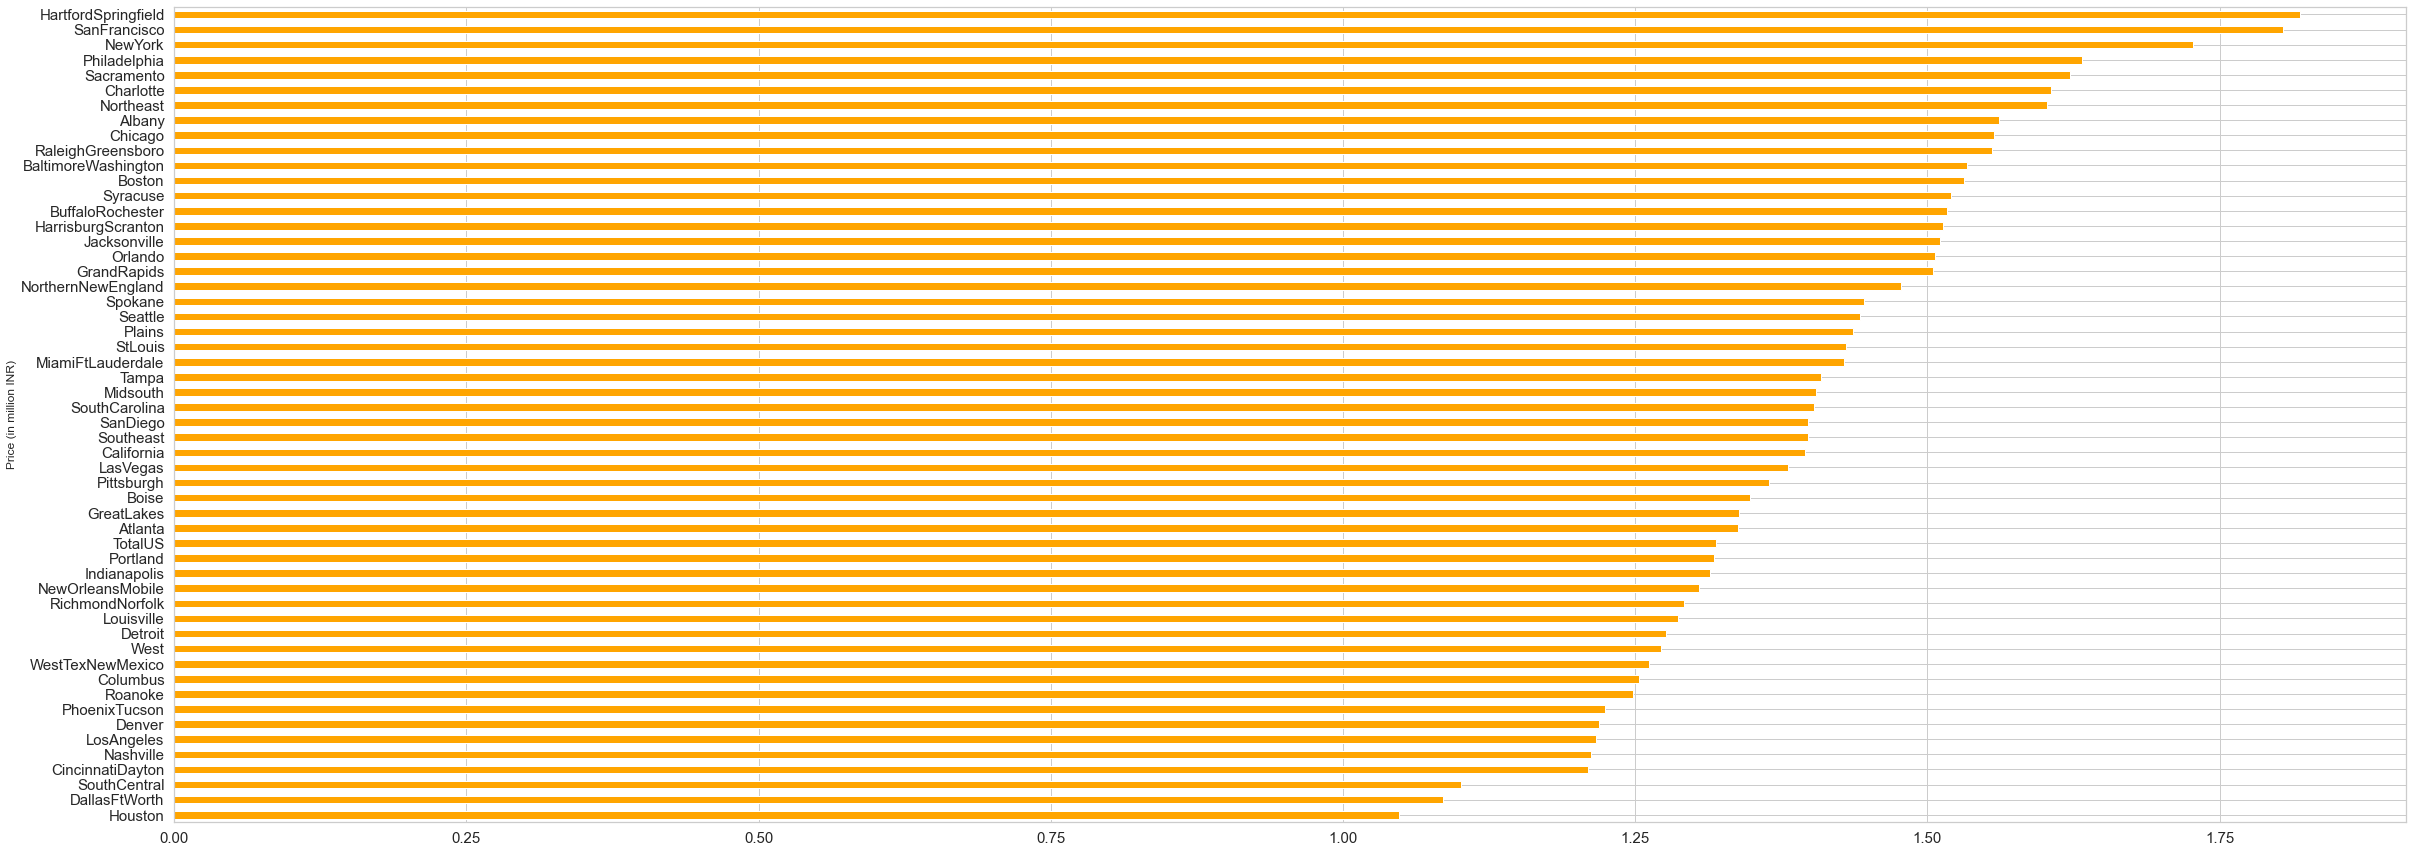

In [ ]:
AD.groupby(['region'])['AveragePrice'].mean().sort_values()[:100].plot(kind='barh', figsize=(40,15), fontsize=15, color='orange')
plt.ylabel('Price (in million INR)')

<Figure size 1224x720 with 0 Axes>

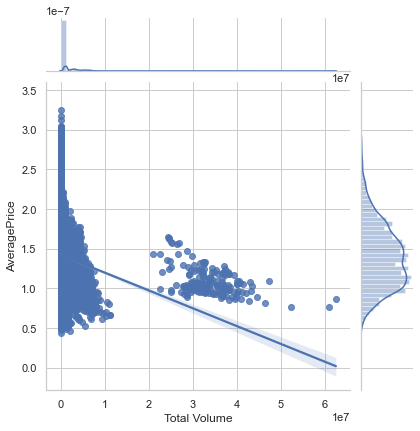

In [ ]:
plt.figure(figsize=(17,10))
sns.jointplot('Total Volume','AveragePrice',data=AD,kind='reg')

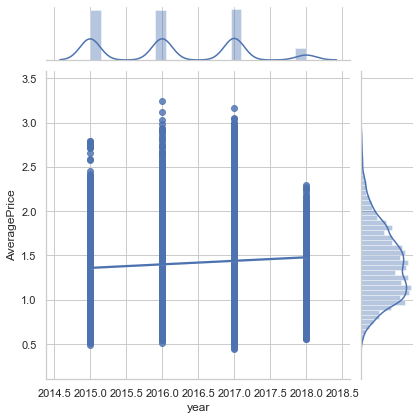

In [ ]:
#plt.figure(figsize=(17,10))
sns.jointplot('year','AveragePrice',data=AD,kind='reg')

In [ ]:
# Using seaborn's regplot function to plot the scatter plot for the Year and Price columns with the regression line.
# done just for revision

'''plt.figure(figsize=(17,10))
sns.regplot(data=AD, x='year', y='AveragePrice', color='brown')

plt.title('Plot showing the variation of Price with Year')'''

"plt.figure(figsize=(17,10))\nsns.regplot(data=AD, x='year', y='AveragePrice', color='brown')\n\nplt.title('Plot showing the variation of Price with Year')"

In [ ]:
# done just for revision
'''AD.plot(kind='scatter', x='year', y='AveragePrice', figsize=(7, 4), color='purple', grid=True)

plt.title('Scatter plot showing the variation per year  with price')'''

"AD.plot(kind='scatter', x='year', y='AveragePrice', figsize=(7, 4), color='purple', grid=True)\n\nplt.title('Scatter plot showing the variation per year  with price')"

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

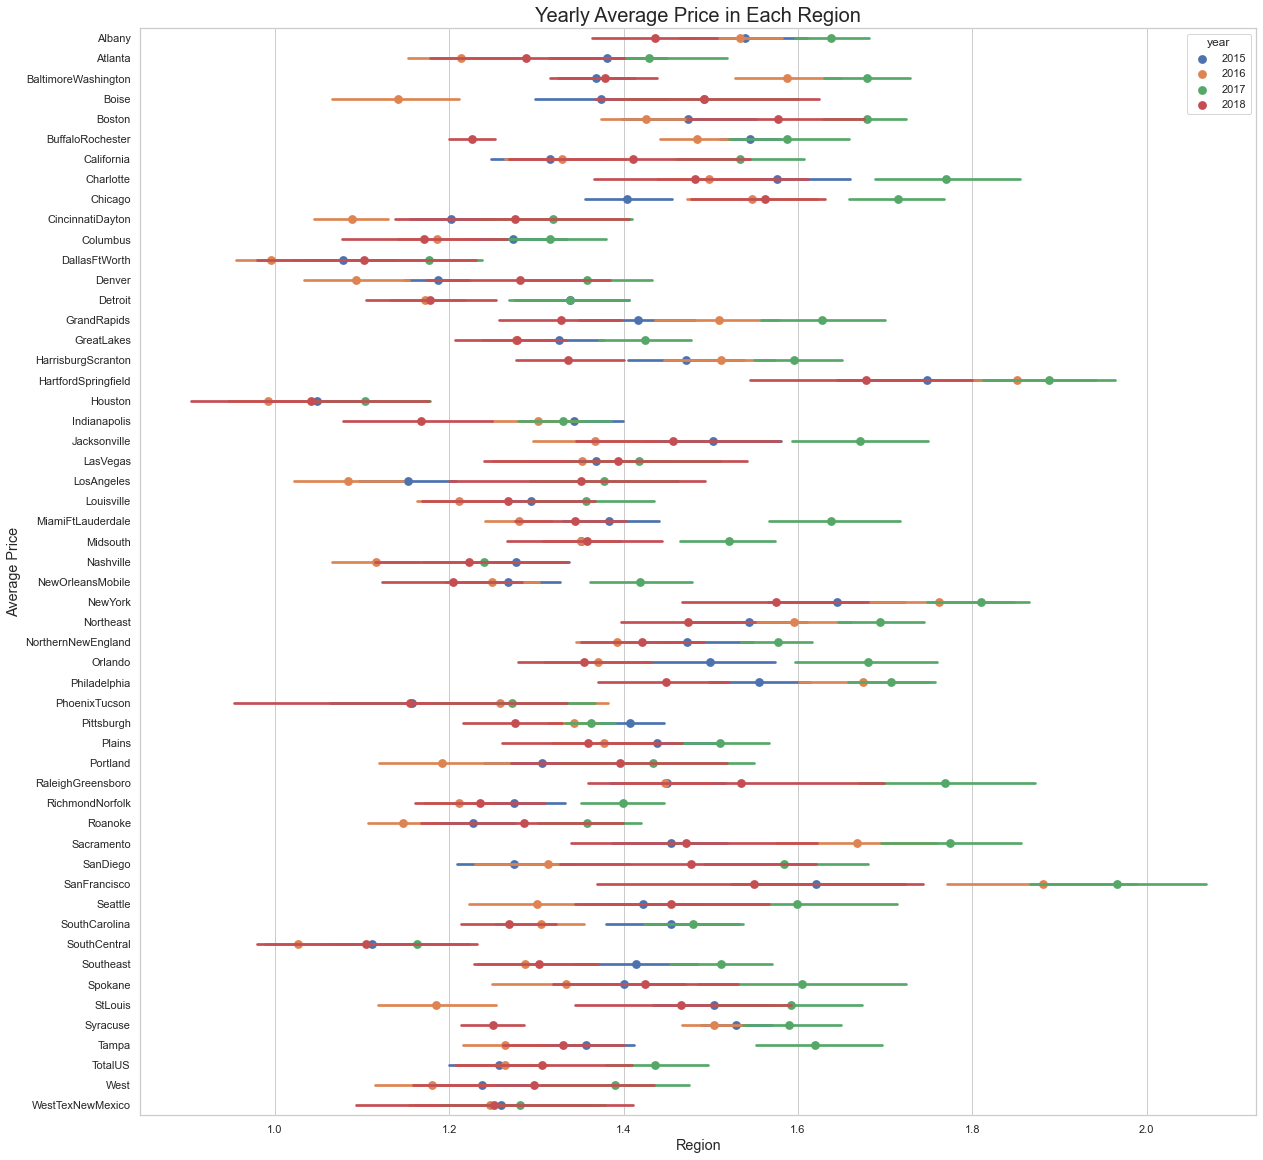

In [ ]:
# First time i am using this shart, good chart showing price variance since 2015-2018
plt.figure(figsize=(20,20))
sns.pointplot(x='AveragePrice',y='region',data=AD, hue='year',join=False)
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

Hartfordspringfield and San Fransisco seems to be the costliest states while southcentral and houston remains to be the cheapest.

In [ ]:
corr_matrix = AD.corr()
AD.tail(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,conventional,organic
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,0,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,1,0,1


We will be converting only the avacado type to two different columns

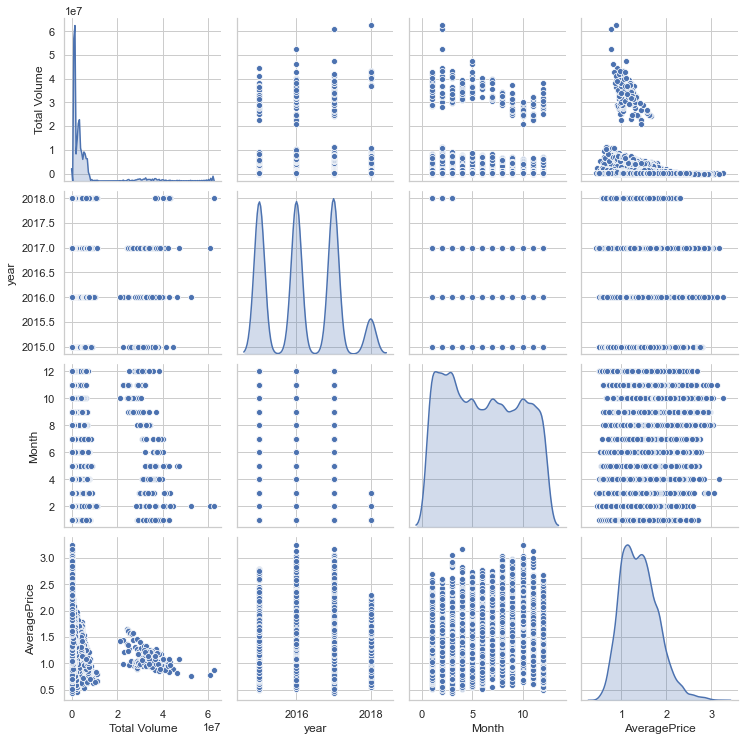

In [ ]:
sns.pairplot(AD[["type", "region", "Total Volume", "year", "Month", "AveragePrice"]], diag_kind="kde")

***We are not doing an inplace replacement while dropping so as to find any relation between the dropped columns***

In [ ]:
#We will be converting only the avacado type to two different columns
#AD.hist(bins=50, figsize=(20,15))
corr1 =  corr_matrix["AveragePrice"].sort_values(ascending=False)
n = pd.get_dummies(AD.type)
AD = pd.concat([AD, n], axis=1)
#m = pd.get_dummies(AD.region)
#AD= pd.concat([SD, m], axis=1)
drops = ['AveragePrice']
print(corr1)

AveragePrice    1.000000
Month           0.162409
year            0.093197
XLarge Bags    -0.117592
Unnamed: 0     -0.133008
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64


In [ ]:
#AD_subset = AD.drop(['Unnamed: 0', '4046','4225','4770','Small Bags', 'Large Bags', 'XLarge Bags','type','Date','Total Bags'], axis=1)
AD_subset = AD.drop(['Unnamed: 0', 'type','Date'], axis=1)
AD_subset.head(1)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany


###### Understanding the data using profile report and correlation matrix###
 not using profile report ...


 Now lets have an idea about the relationship between our Features(Correlation)

Text(0.5, 1.0, 'Correlation between features')

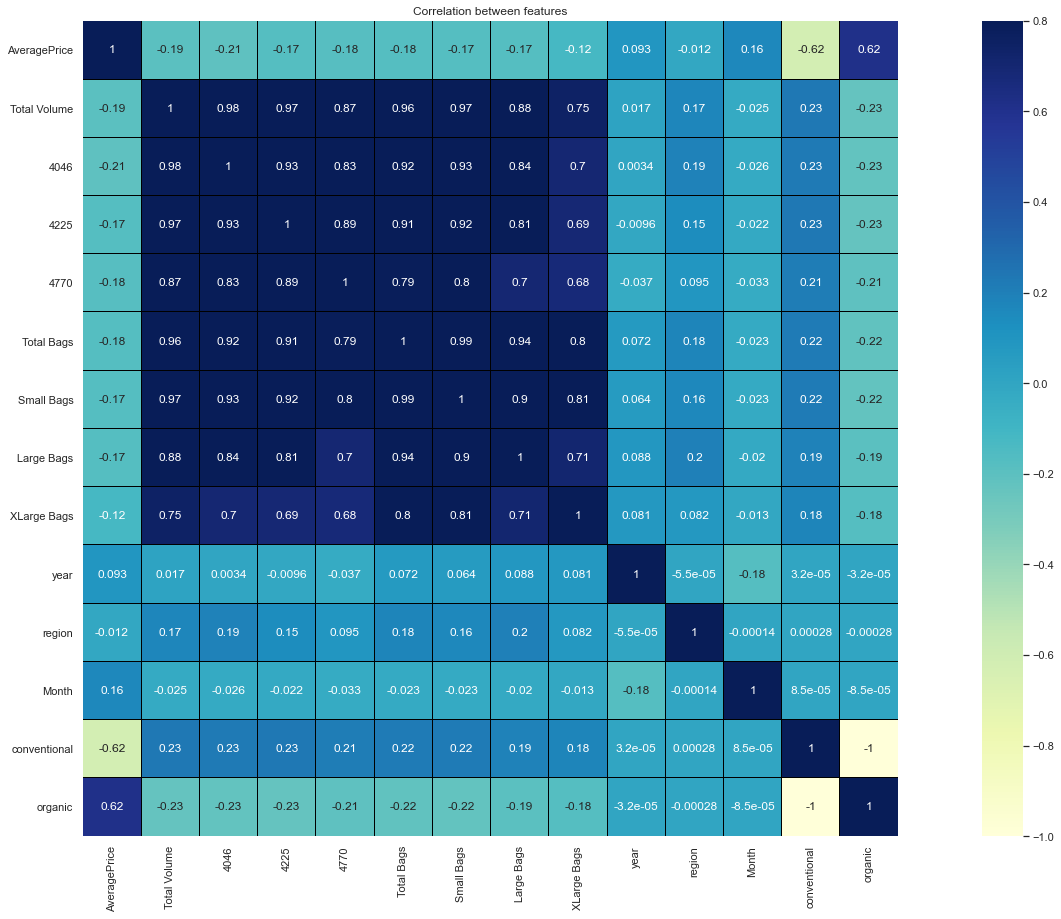

In [ ]:
corr = AD_subset.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

As we can from the heatmap above, all the Features are not corroleted with the Average Price column, instead most of them are correlated with each other. So now I am bit worried because that will not help us get a good model. Lets try and see. First we have to do some Feature Engineering on the categorical Features : region and type

Tring to some features of correlation graph

In [ ]:
np.tril(np.ones(corr.shape)).astype(np.bool)[0:5,0:5]

'''array([[ True, False, False, False, False],
       [ True,  True, False, False, False],
       [ True,  True,  True, False, False],
       [ True,  True,  True,  True, False],
       [ True,  True,  True,  True,  True]])'''

'array([[ True, False, False, False, False],\n       [ True,  True, False, False, False],\n       [ True,  True,  True, False, False],\n       [ True,  True,  True,  True, False],\n       [ True,  True,  True,  True,  True]])'

In [ ]:
df_lt = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))

In [ ]:
df_lt.iloc[0:5,0:3]

,AveragePrice,Total Volume,4046
AveragePrice,1.000000,NaN,NaN
Total Volume,-0.192752,1.000000,NaN
4046,-0.208317,0.977863,1.000000
4225,-0.172928,0.974181,0.926110
4770,-0.179446,0.872202,0.833389


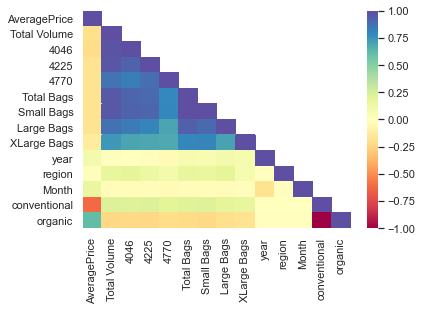

In [ ]:
hmap=sns.heatmap(df_lt,cmap="Spectral")
hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn.png",
                    format='png',
                    dpi=250)

### Using Mask

In [ ]:
#  create a numpy array to use it as our mask.
mask_ut=np.triu(np.ones(corr.shape)).astype(np.bool)

In [ ]:
'''Here we create a boolean matrix with True on upper triangular matrix and False on lower
triangular correlation matrix with Numpy’s np.triu() function.'''
mask_ut[0:5,0:5]

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True]])

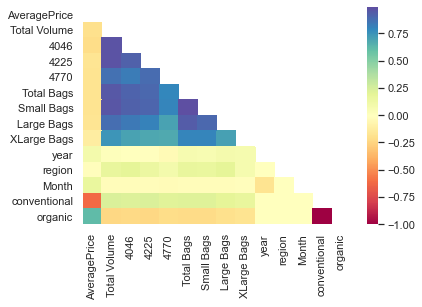

In [ ]:
# The mask argument will mask the upper triangular matrix and make us a heatmap with lower triangular matrix.
sns.heatmap(corr, mask=mask_ut, cmap="Spectral")
hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn_using_mask.png",
                    format='png',
                    dpi=150)

as we can see we have 54 regions and 2 unique types, so it's going to be easy to to transform the type feature to dummies, but for the region its going to be a bit complexe so I decided to drop the entire column. I will drop the Date Feature as well because I already have 3 other columns for the Year, Month and Day.

In [ ]:
# Violen plot showing Price spread per year
'''import plotly.express as px

plt.figure(figsize=(15,8));
sns.violinplot(data=AD, x='year', y='AveragePrice',palette='magma');
plt.ylim(0,4,.3);
plt.title('Violen plot showing Price spread')'''

"import plotly.express as px\n\nplt.figure(figsize=(15,8));\nsns.violinplot(data=AD, x='year', y='AveragePrice',palette='magma');\nplt.ylim(0,4,.3);\nplt.title('Violen plot showing Price spread')"

In [ ]:
# Box plot showing Price spread per year
'''
plt.figure(figsize=(15, 9))
sns.boxplot(data=AD,x='year',y='AveragePrice',palette='viridis',width=0.2)
plt.ylim(0,4,.3);
plt.xticks(rotation=90)
plt.title('Box plot showing Price spread')'''

"\nplt.figure(figsize=(15, 9))  \nsns.boxplot(data=AD,x='year',y='AveragePrice',palette='viridis',width=0.2)\nplt.ylim(0,4,.3);\nplt.xticks(rotation=90)\nplt.title('Box plot showing Price spread')"

In [ ]:
#pdpf.ProfileReport(AD_subset)

<a id=section4></a>
## 4. Data Preparation
Since now it is a clean dataset, Data Wrangling is not required. Hence here we will be mainly focussing on Feature Engineering and Scaling.

### Feature Extraction and Engineering:

We will extract the existing features and outcomes in separate variables.

###### Splitting the data into train and test after extracting the lable(AveragePrice) that we are going to predict ###


***Encoding columns region and type of avacadoes so that they can be fed as input to the model***

<a id=section5></a>
# Modeling and Evaluation

##### Logistic Regression

In [ ]:
#AD= AD.drop(['conventional', 'organic'], axis=1) # did not work well
AD.head(1)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany


In [ ]:
AD_subset.head(1)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany


Now data is ready! lets apply our model which is going to be the __Linear Regression__ because our Target variable 'AveragePrice'is continuous.

Let's now begin to train out regression model!

We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(AD_subset.region)
label_encoder.classes_
AD_subset.region =  label_encoder.transform(AD_subset.region)
print('done ji')

done ji


In [ ]:
AD_subset.head(1)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany


**Splitting the data into train and test**

Creating and Training the Model



In [ ]:
X = AD_subset.loc[:,AD_subset.columns != 'AveragePrice']
Y = AD_subset.AveragePrice
AD_subset.AveragePrice.sort_values(ascending= False)

14125    3.25
17428    3.17
14124    3.12
16055    3.05
16720    3.04
         ... 
1716     0.49
15262    0.49
15473    0.48
7412     0.46
15261    0.44
Name: AveragePrice, Length: 18249, dtype: float64

In [ ]:
#AD_subset.head(5)
#X.head(1) # check data
Y.head(1)  # check data

0    1.33
Name: AveragePrice, dtype: float64

In [ ]:
X.shape

(18249, 13)

In [ ]:
Y.shape

(18249,)

In [ ]:
# Came back and tried this .. did not work
# X = X.drop(['4046', '4225','4770','Small Bags','Large Bags','XLarge Bags'], axis=1)

In [ ]:
X.head(1)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,conventional,organic
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,12,1,0


In [ ]:
#!pip install scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

**Evaluating different Models**

In [ ]:
# First evaluating LinearRegression
from sklearn.linear_model import LinearRegression
LinearRegressionModel = LinearRegression(fit_intercept = False, normalize = False).fit(X_train, y_train)
print("Model Accuracy using Linear Regression is", LinearRegressionModel.score(X_test, y_test))

Model Accuracy using Linear Regression is 0.4443437449369002


Accuracy Score is low, need to try other model evaluation

In [ ]:
# regression coefficients , read this so was trying it
print('Coefficients: \n', LinearRegressionModel.coef_)

Coefficients: 
 [-7.56196171e-05  7.55276145e-05  7.57310504e-05  7.52664083e-05
 -1.16820525e-02  1.17576837e-02  1.17575248e-02  1.17591625e-02
  5.42438233e-02  2.69900360e-04  2.06134863e-02 -1.08332943e+02
 -1.07844966e+02]


The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

In [ ]:
# variance score: 1 means perfect prediction , read this result same as Accuracy score
print('Variance score: {}'.format(LinearRegressionModel.score(X_test, y_test)))

Variance score: 0.4443437449369002


Predect the model using MAE,MSE and RMSE

In [ ]:
predLR=LinearRegressionModel.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predLR))
print('MSE:', metrics.mean_squared_error(y_test, predLR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predLR)))

MAE: 0.23255741259410737
MSE: 0.09003499440404837
RMSE: 0.3000583183383663


The RMSE is low so we can say that we do have a good model, but lets check to be more sure.

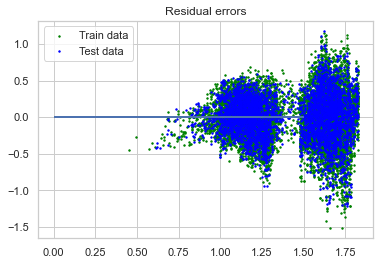

In [ ]:
## Residual Error plot looks like this:
## plotting residual errors in training data
plt.scatter(LinearRegressionModel.predict(X_train), LinearRegressionModel.predict(X_train) - y_train,
            color = "green", s = 2, label = 'Train data')
## plotting residual errors in test data
plt.scatter(LinearRegressionModel.predict(X_test), LinearRegressionModel.predict(X_test) - y_test,
            color = "blue", s = 2, label = 'Test data')
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 1.5, linewidth = 2)
## plotting legend
plt.legend(loc = 'upper left')
## plot title
plt.title("Residual errors")

## function to show plot
plt.show()

Plotting the y_test vs the predictions.

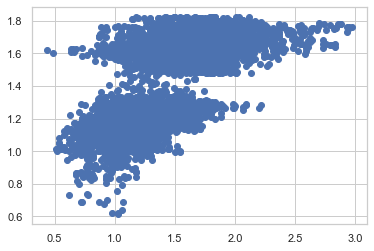

In [ ]:
plt.scatter(x=y_test,y=predLR)

As we can see that we dont have a straigt line so I am not sure that this is the best model we can apply on our data


###### GridSearchCV Model

##### Use Hyper Parameter tuning

In [ ]:
numberlist = []
for x in range (2, 7):
    numberlist.append(x)
print(numberlist)

[2, 3, 4, 5, 6]


In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

#using gridsearch to find the best parameter
params = {'n_neighbors':numberlist}
KNG = neighbors.KNeighborsRegressor()
KNG_model = GridSearchCV(KNG, params, cv=3)
KNG_model.fit(X_train, y_train)
score = KNG_model.score(X_test,y_test)
print("Model Accuracy using KNG regressor is:",score)

Model Accuracy using KNG regressor is: 0.6585798875743487


In [ ]:
predCV=KNG_model.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predCV))
print('MSE:', metrics.mean_squared_error(y_test, predCV))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predCV)))

MAE: 0.1629143107604646
MSE: 0.05532153670830593
RMSE: 0.2352053075683156


The RMSE is low so we can say that we do have a good model, but lets check to be more sure.

Text(0, 0.5, 'Predicted Y')

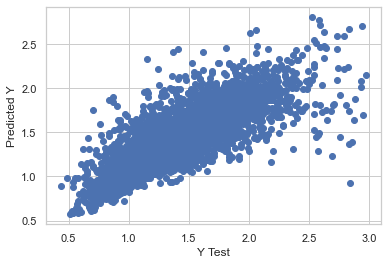

In [ ]:
plt.scatter(x=y_test,y=predCV)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

As we can see we have a straigt line so model could be the best one


In [ ]:
print(X_train.shape)

(13686, 13)


In [ ]:
print(y_train.shape)

(13686,)


#####  DecisionTree Regressor model



In [ ]:
from sklearn.tree import DecisionTreeRegressor
modelDT=DecisionTreeRegressor(max_features='auto', random_state=0)
modelDT.fit(X_train,y_train)
#pred=dtr.predict(X_test)


'''bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)'''

"bootstrap=True, ccp_alpha=0.0, criterion='mse',\n                      max_depth=None, max_features='auto', max_leaf_nodes=None,\n                      max_samples=None, min_impurity_decrease=0.0,\n                      min_impurity_split=None, min_samples_leaf=1,\n                      min_samples_split=2, min_weight_fraction_leaf=0.0,\n                      n_estimators=100, n_jobs=None, oob_score=False,\n                      random_state=0, verbose=0, warm_start=False)"

In [ ]:
y_pred_trainDT = modelDT.predict(X_train)

In [ ]:
y_pred_testDT = modelDT.predict(X_test)

In [ ]:
predDT=modelDT.predict(X_test)

In [ ]:
scoreDT=modelDT.score(X_test, y_test)
print("Model Accuracy using KNG regressor is:",scoreDT)

Model Accuracy using KNG regressor is: 0.7797006457642212


Text(0, 0.5, 'Predicted Y')

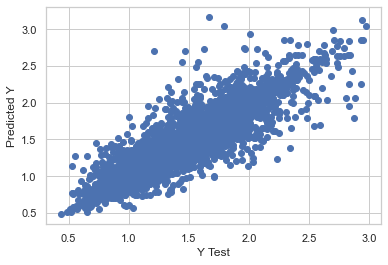

In [ ]:
plt.scatter(x=y_test,y=predDT)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Nice, here we can see that we nearly have a straigt line, in other words its better than the Linear regression model, and to be more sure lets check the RMSE

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predDT))
print('MSE:', metrics.mean_squared_error(y_test, predDT))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predDT)))

MAE: 0.12240631163708086
MSE: 0.03569590181897874
RMSE: 0.18893359102864354


RMSE is lower than the Linear Regression model and GridSearchCV.

Let's try RandomForestRegressor to see if it improve  predictions


###### RandomForestRegressor model

In this i will create two models using hyperparameters

In [ ]:
# Test Train for Randon Forest Regressor
from sklearn.model_selection import train_test_split
X_train_RFR, X_test_RFR, y_train_RFR, y_test_RFR = train_test_split(X, Y, test_size=0.25, random_state=1)

In [ ]:
print(X_train_RFR.shape)
print(y_train_RFR.shape)

(13686, 13)
(13686,)


In [ ]:
print(X_test_RFR.shape)
print(y_test_RFR.shape)

(4563, 13)
(4563,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1RFR = RandomForestRegressor(random_state = 0)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model2RFR = RandomForestRegressor(random_state=1, n_estimators=50,
                                   bootstrap=True,  min_samples_split=2,
                                   n_jobs=10, min_samples_leaf=1,
                                   max_features='auto',oob_score=True)

In [ ]:
model1RFR.fit(X_train_RFR,y_train_RFR)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
model2RFR.fit(X_train_RFR, y_train_RFR)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=10, oob_score=True,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
print('Random Forest Regressor score for model 1 is": ', model1RFR.score(X_test_RFR, y_test_RFR))

Random Forest Regressor score for model 1 is":  0.8941897804150181


In [ ]:
print('Random Forest Regressor score for model 2 is": ', model2RFR.score(X_test_RFR, y_test_RFR))

Random Forest Regressor score for model 2 is":  0.8904430136839178


In [ ]:
pred1RFR=model1RFR.predict(X_test_RFR)

The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value. It is a risk function, corresponding to the expected value of the squared error loss. It is always non – negative and values close to zero are better.

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test_RFR, pred1RFR))
print('MSE:', metrics.mean_squared_error(y_test_RFR, pred1RFR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_RFR, pred1RFR)))

MAE: 0.09096022353714663
MSE: 0.017144812897216744
RMSE: 0.1309382025889188


In [ ]:
pred2RFR=model2RFR.predict(X_test_RFR)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test_RFR, pred2RFR))
print('MSE:', metrics.mean_squared_error(y_test_RFR, pred2RFR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_RFR, pred2RFR)))

MAE: 0.09212027175104097
MSE: 0.01775191507341661
RMSE: 0.1332363128933573


Well as we can see the RMSE of RF model1 (model1RFR)is lower than the two previous models, so the RandomForest Regressor is the best model in this case.



<AxesSubplot:xlabel='AveragePrice'>

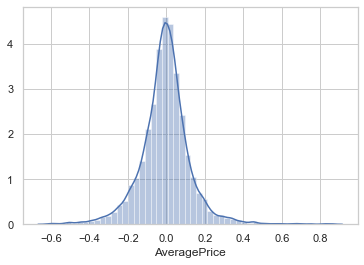

In [ ]:
sns.distplot((y_test_RFR-pred1RFR),bins=50)

Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.


Below table is just a data frame representation of the first 5 y_test(the average price that exists in the data) and pred ( the predicted value of the average price by the model 'Random Forest Regressor), as you can see they are very close to each other.

,Y Test,Pred
14192,2.11,1.9734
1873,0.98,1.0302
7293,1.17,1.2312
15087,1.78,1.5558
9888,1.61,1.8822
420,1.11,1.1873


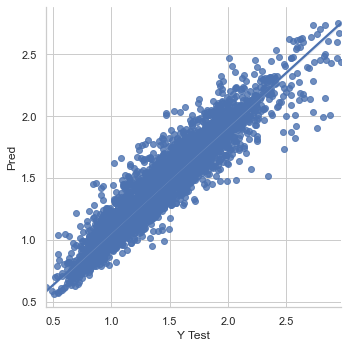

In [ ]:
data = pd.DataFrame({'Y Test':y_test_RFR, 'Pred':pred1RFR},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head(6)

- __Model Evaluation__ using __R2 score ( Model1 of RF)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
pred3RFR=model1RFR.predict(X_train_RFR)
#pred3=model2RFR.predict(X_train_RFR)

In [ ]:
### Assume y is the actual value and f is the predicted values
#y =[10, 20, 30]
#f =[10, 20, 30]
r2 = r2_score(y_test_RFR, pred1RFR)
print('r2 score for perfect test model is', r2)

r2 score for perfect test model is 0.894189780415018


In [ ]:
r3 = r2_score(y_train_RFR, pred3RFR)
print('r2 score for train model is', r3)

r2 score for train model is 0.984117470082051


In [ ]:
# Gives summary of data model->gives value of r-square and adjusted r-square
import statsmodels.formula.api as sm
#X_opt = s.iloc[:, :-1]
#Y1 = s.iloc[:, -1]

#import statsmodels.api as sm
#import statsmodels.api as sm

In [ ]:
import statsmodels.api as sm

In [ ]:
regressor_OLS = sm.OLS(endog = pred3RFR, exog = y_train_RFR).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.140e+07
Date:                Tue, 10 Nov 2020   Prob (F-statistic):                        0.00
Time:                        16:13:33   Log-Likelihood:                          21447.
No. Observations:               13686   AIC:                                 -4.289e+04
Df Residuals:                   13685   BIC:                                 -4.288e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
AveragePrice     0.9965      0.000   3376.452      0.000       0.996       0.997
==============================================================================
Omnibus:                     1891.565   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16436.662
Skew:                          -0.384   Prob(JB):                         0.00
Kurtosis:                       8.314   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""